In [38]:
import numpy as np
import matplotlib.pyplot as plt
from pydantic import BaseModel,validator

## 这个文件我们对比不同的超参数alpha的影响

In [39]:
class Results():
    folder_name: str
    seed :int
    alpha:float
    
    #读取gloabl metric 和local metric
    def read_metirc(self,npz_file)->dict:
        data=np.load(npz_file,allow_pickle=True)
        print("npz_file",npz_file)
        global_metric_dict = data['global_metric'].item()
        local_metric_dict = data['local_metric'].item()
        return global_metric_dict,local_metric_dict
        

In [40]:

alpha_value = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
seed_value = [10,100,200]

In [41]:
alpha_value = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
seed_value = [10, 100, 200]
final_result_dict = {}

for alpha in alpha_value:
    seed_result_dict = {}  # 移动到这里，为每个alpha创建新的字典
    for seed in seed_value:
        # 为每个seed创建新的字典
        value_dict = {"psnr": 0, "ssim": 0}  # 假设这里使用随机值来模拟实际的计算结果
        seed_result_dict[f"seed_{seed}"] = value_dict
    final_result_dict[f"alpha_{alpha}"] = seed_result_dict
   

In [42]:
final_result_dict

{'alpha_0.1': {'seed_10': {'psnr': 0, 'ssim': 0},
  'seed_100': {'psnr': 0, 'ssim': 0},
  'seed_200': {'psnr': 0, 'ssim': 0}},
 'alpha_0.2': {'seed_10': {'psnr': 0, 'ssim': 0},
  'seed_100': {'psnr': 0, 'ssim': 0},
  'seed_200': {'psnr': 0, 'ssim': 0}},
 'alpha_0.3': {'seed_10': {'psnr': 0, 'ssim': 0},
  'seed_100': {'psnr': 0, 'ssim': 0},
  'seed_200': {'psnr': 0, 'ssim': 0}},
 'alpha_0.4': {'seed_10': {'psnr': 0, 'ssim': 0},
  'seed_100': {'psnr': 0, 'ssim': 0},
  'seed_200': {'psnr': 0, 'ssim': 0}},
 'alpha_0.5': {'seed_10': {'psnr': 0, 'ssim': 0},
  'seed_100': {'psnr': 0, 'ssim': 0},
  'seed_200': {'psnr': 0, 'ssim': 0}},
 'alpha_0.6': {'seed_10': {'psnr': 0, 'ssim': 0},
  'seed_100': {'psnr': 0, 'ssim': 0},
  'seed_200': {'psnr': 0, 'ssim': 0}},
 'alpha_0.7': {'seed_10': {'psnr': 0, 'ssim': 0},
  'seed_100': {'psnr': 0, 'ssim': 0},
  'seed_200': {'psnr': 0, 'ssim': 0}},
 'alpha_0.8': {'seed_10': {'psnr': 0, 'ssim': 0},
  'seed_100': {'psnr': 0, 'ssim': 0},
  'seed_200': {'psnr': 

In [43]:
import os
import re
import json
search_path = "../Model_out"

#搜索的算法
def search(search_path)->dict:
    #读取文件夹下的所有文件
    files = os.listdir(search_path)
    #把不同的alpha 和 不同的seed 整理
    
    for alpha in alpha_value:

        for seed in seed_value:
            g_metric = 0
            l_metric = 0
            folder_name=f"2_29_expr_alpha_{alpha}_seed_{seed}/"
            user_data={
            'folder_name':folder_name,
            'seed':seed,
            'alpha':alpha
            }
            R=Results()
            npz_file = "../Model_out/"+f"{folder_name}"+f"seed_{seed}_modes32_alpha_{alpha}_"+"losses_with_epoch.npz"
            g_metric,l_metric = R.read_metirc(npz_file=npz_file)
            
            final_result_dict[f"alpha_{alpha}"][f"seed_{seed}"]["ssim"] = g_metric["ssim"]
            final_result_dict[f"alpha_{alpha}"][f"seed_{seed}"]["psnr"] = g_metric["psnr"]
      
            
            print("test",final_result_dict)
       
    return final_result_dict


In [44]:

final_result_dict

{'alpha_0.1': {'seed_10': {'psnr': 0, 'ssim': 0},
  'seed_100': {'psnr': 0, 'ssim': 0},
  'seed_200': {'psnr': 0, 'ssim': 0}},
 'alpha_0.2': {'seed_10': {'psnr': 0, 'ssim': 0},
  'seed_100': {'psnr': 0, 'ssim': 0},
  'seed_200': {'psnr': 0, 'ssim': 0}},
 'alpha_0.3': {'seed_10': {'psnr': 0, 'ssim': 0},
  'seed_100': {'psnr': 0, 'ssim': 0},
  'seed_200': {'psnr': 0, 'ssim': 0}},
 'alpha_0.4': {'seed_10': {'psnr': 0, 'ssim': 0},
  'seed_100': {'psnr': 0, 'ssim': 0},
  'seed_200': {'psnr': 0, 'ssim': 0}},
 'alpha_0.5': {'seed_10': {'psnr': 0, 'ssim': 0},
  'seed_100': {'psnr': 0, 'ssim': 0},
  'seed_200': {'psnr': 0, 'ssim': 0}},
 'alpha_0.6': {'seed_10': {'psnr': 0, 'ssim': 0},
  'seed_100': {'psnr': 0, 'ssim': 0},
  'seed_200': {'psnr': 0, 'ssim': 0}},
 'alpha_0.7': {'seed_10': {'psnr': 0, 'ssim': 0},
  'seed_100': {'psnr': 0, 'ssim': 0},
  'seed_200': {'psnr': 0, 'ssim': 0}},
 'alpha_0.8': {'seed_10': {'psnr': 0, 'ssim': 0},
  'seed_100': {'psnr': 0, 'ssim': 0},
  'seed_200': {'psnr': 

In [45]:
a=search(search_path)

npz_file ../Model_out/2_29_expr_alpha_0.1_seed_10/seed_10_modes32_alpha_0.1_losses_with_epoch.npz
test {'alpha_0.1': {'seed_10': {'psnr': [34.610802757582306, 32.540818644955756, 34.11015213648081, 33.96915146548488, 34.913162440051686, 35.24908941423305, 35.79076027643382, 36.31589396414858, 36.71191314268998, 37.23872634699682, 36.346635619998004, 36.963566828690915, 37.612094350639886, 38.11174843987918, 37.01111159841905, 38.448289491699775, 38.55373276765426, 37.02835385202383, 36.60876380828392, 36.933394514278596, 38.255088404506786, 38.278065883925855, 38.79747332450742, 38.56889709768591, 38.925786917936236, 39.33995306915544, 39.28382173514362, 39.30461043343792, 39.429402181225385, 39.14372263091086, 39.34885173716242, 39.59035125043465, 39.40905319504265, 39.48289772895785, 37.161257538032025, 39.78968851319703, 40.10641696509441, 38.696951155664856, 33.6565256758993, 39.1403535430976, 38.640035825517806, 38.684840135998456, 39.928677040977234, 39.86421967156234, 40.1719703

In [46]:
# 寻找Pareto前沿
def is_pareto_efficient_simple(points):
    """
    寻找Pareto前沿的点
    :param points: 一个包含多个点的数组，每个点是一个指标值的列表
    :return: 一个布尔数组，表示每个点是否是Pareto前沿的一部分
    """
    is_efficient = np.ones(points.shape[0], dtype=bool)
    for i, c in enumerate(points):
        if is_efficient[i]:
            # Pareto前沿点不应该被任何其他点在所有维度上同时超越
            is_efficient[is_efficient] = np.any(points[is_efficient] > c, axis=1)  
            is_efficient[i] = True  # 保持当前点在数组中
    return is_efficient


In [47]:
# 设置颜色映射
colormap = plt.cm.Blues
alpha_value=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 为每个方法绘制散点图
markers = ['*',"s"]  # 标记列表
# 生成颜色列表，确保即使是最浅的颜色也足够深
colors = [colormap(i * 0.7 + 0.2) for i in np.linspace(0, 1, len(alpha_value))]



0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


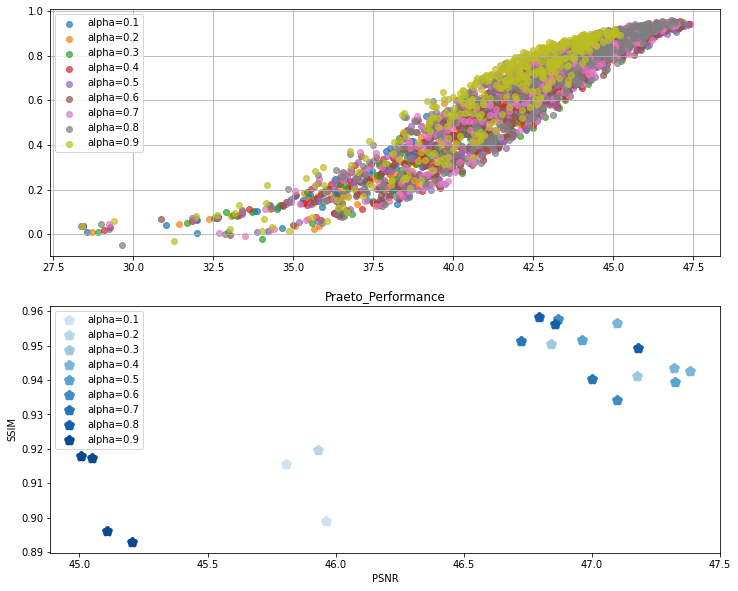

In [48]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))



for idx, alpha in enumerate(alpha_value): 
   print(alpha)
   psnr_values = final_result_dict[f"alpha_{alpha}"]["seed_100"]["psnr"]
   ssim_values = final_result_dict[f"alpha_{alpha}"]["seed_100"]["ssim"]
   ax[0].scatter(psnr_values,
              ssim_values,alpha=0.7,label=f"alpha={alpha}")
   ax[0].legend()
   ax[0].grid()
   # 找到Pareto前沿

   # 将PSNR和SSIM组合成一个点的列表
   points = np.column_stack((psnr_values, ssim_values))
   # 找到Pareto前沿
   pareto = is_pareto_efficient_simple(points)
   # 突出显示Pareto前沿的点
   # 对Pareto前沿的点进行排序
   pareto_points = points[pareto]
   sorted_indices = np.argsort(pareto_points[:, 0])
   sorted_pareto_points = pareto_points[sorted_indices]
 
    
   # 绘制Pareto前沿
   ax[1].scatter(sorted_pareto_points[:, 0], sorted_pareto_points[:, 1], linewidth=5,color=colors[idx], label=f'alpha={alpha}',marker=markers[0])
   ax[1].legend()

plt.title("Praeto_Performance")
plt.xlabel("PSNR")
plt.ylabel("SSIM")
plt.legend()

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly co

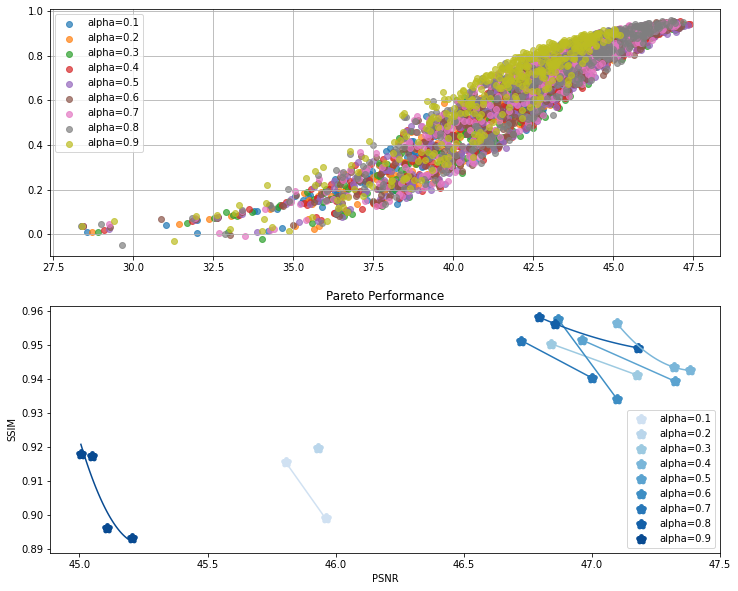

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# 假定final_result_dict和alpha_value已经定义
# 假定is_pareto_efficient_simple已经定义
# 假定colors和markers也已经准备好

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

for idx, alpha in enumerate(alpha_value):
    print(alpha)
    psnr_values = final_result_dict[f"alpha_{alpha}"]["seed_100"]["psnr"]
    ssim_values = final_result_dict[f"alpha_{alpha}"]["seed_100"]["ssim"]
    ax[0].scatter(psnr_values, ssim_values, alpha=0.7, label=f"alpha={alpha}")
    ax[0].legend()
    ax[0].grid()

    # 将PSNR和SSIM组合成一个点的列表
    points = np.column_stack((psnr_values, ssim_values))
    # 找到Pareto前沿
    pareto = is_pareto_efficient_simple(points)
    # 对Pareto前沿的点进行排序
    pareto_points = points[pareto]
    sorted_indices = np.argsort(pareto_points[:, 0])
    sorted_pareto_points = pareto_points[sorted_indices]
    
    # 绘制Pareto前沿
    ax[1].scatter(sorted_pareto_points[:, 0], sorted_pareto_points[:, 1], linewidth=5, color=colors[idx], label=f'alpha={alpha}', marker=markers[0])
    ax[1].legend()

    # 拟合Pareto前沿
    # 使用二次多项式拟合
    z = np.polyfit(sorted_pareto_points[:, 0], sorted_pareto_points[:, 1], 2)
    p = np.poly1d(z)
    # 生成平滑的x值
    xp = np.linspace(sorted_pareto_points[:, 0].min(), sorted_pareto_points[:, 0].max(), 100)
    # 计算拟合后的y值
    yp = p(xp)
    # 绘制拟合曲线
    ax[1].plot(xp, yp, color=colors[idx])

plt.title("Pareto Performance")
plt.xlabel("PSNR")
plt.ylabel("SSIM")
plt.show()


0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


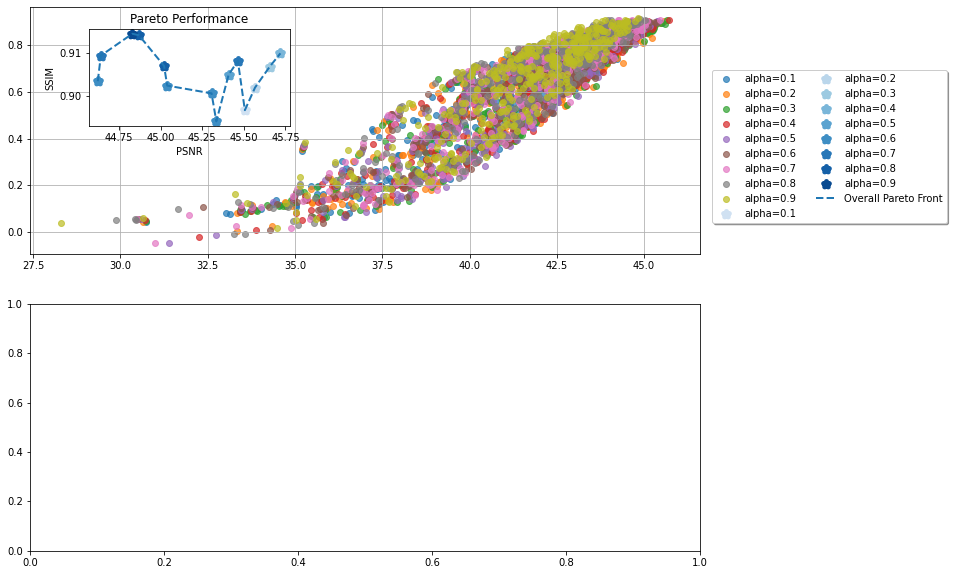

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# ...省略之前的代码...
# 假定final_result_dict和alpha_value已经定义
# 假定is_pareto_efficient_simple已经定义
# 假定colors和markers也已经准备好

fig, ax = plt.subplots(2, 1, figsize=(12, 10))
# 创建一个空列表来存储所有Pareto前沿点
all_pareto_points = []
for idx, alpha in enumerate(alpha_value):
    print(alpha)
    psnr_values = final_result_dict[f"alpha_{alpha}"]["seed_200"]["psnr"]
    ssim_values = final_result_dict[f"alpha_{alpha}"]["seed_200"]["ssim"]
    ax[0].scatter(psnr_values, ssim_values, alpha=0.7, label=f"alpha={alpha}")
    ax[0].grid()

    # 将PSNR和SSIM组合成一个点的列表
    points = np.column_stack((psnr_values, ssim_values))
    # 找到Pareto前沿
    pareto = is_pareto_efficient_simple(points)
    # 对Pareto前沿的点进行排序
    pareto_points = points[pareto]
    sorted_indices = np.argsort(pareto_points[:, 0])
    sorted_pareto_points = pareto_points[sorted_indices]
    # 将当前alpha值的Pareto前沿点添加到列表中
    all_pareto_points.extend(sorted_pareto_points)
    # 绘制Pareto前沿
    if idx == 0:
        # 参数表示大小和位置 [左, 下, 宽度, 高度]，相对于fig坐标系（0到1之间）
        ax2 = inset_axes(ax[0], width="30%", height="30%", loc='lower left',
                        bbox_to_anchor=(0.08, 0.5, 1, 1.3),
                        bbox_transform=ax[0].transAxes)
    ax2.scatter(sorted_pareto_points[:, 0], sorted_pareto_points[:, 1], 
                linewidth=5, color=colors[idx], label=f'alpha={alpha}', marker=markers[0])

# 转换为numpy数组，方便处理
all_pareto_points = np.array(all_pareto_points)

# 根据PSNR值对所有点进行排序
sorted_all_indices = np.argsort(all_pareto_points[:, 0])
sorted_all_pareto_points = all_pareto_points[sorted_all_indices]

# 在ax[1]上绘制所有alpha值的Pareto前沿点的统一平滑线
ax2.plot( sorted_all_pareto_points[:,0],sorted_all_pareto_points[:,1], '--', linewidth=2,
           label='Overall Pareto Front')

# 将图例放在图下方
fig.legend(loc='upper center', bbox_to_anchor=(1.05, 0.8), shadow=True, ncol=2)

plt.title("Pareto Performance")
plt.xlabel("PSNR")
plt.ylabel("SSIM")
plt.savefig("Pareto_Performance.png",dpi=300)
plt.show()


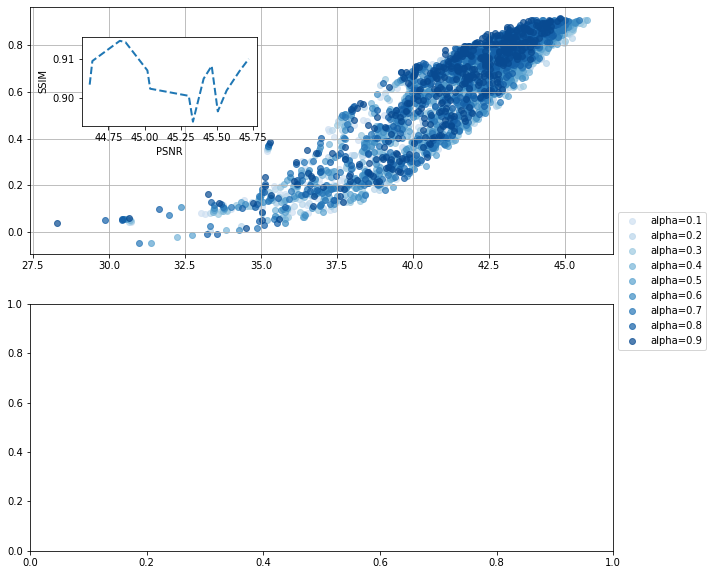

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Assumed pre-defined variables and functions:
# final_result_dict, alpha_value, is_pareto_efficient_simple, colors, and markers

fig, ax = plt.subplots(2, 1, figsize=(12, 10))
all_pareto_points = []

# Collect handles and labels for the main plot legend
main_plot_handles = []
main_plot_labels = []

# Iterate through each alpha value to plot and process PSNR and SSIM values
for idx, alpha in enumerate(alpha_value):
    psnr_values = final_result_dict[f"alpha_{alpha}"]["seed_200"]["psnr"]
    ssim_values = final_result_dict[f"alpha_{alpha}"]["seed_200"]["ssim"]
    
    scatter = ax[0].scatter(psnr_values, ssim_values, alpha=0.7, color=colors[idx], label=f"alpha={alpha}")
    ax[0].grid(True)
    
    # Collect handles and labels for the legend
    main_plot_handles.append(scatter)
    main_plot_labels.append(f"alpha={alpha}")

    # Processing for Pareto front
    points = np.column_stack((psnr_values, ssim_values))
    pareto = is_pareto_efficient_simple(points)
    pareto_points = points[pareto]
    sorted_indices = np.argsort(pareto_points[:, 0])
    sorted_pareto_points = pareto_points[sorted_indices]
    all_pareto_points.extend(sorted_pareto_points)

# After all points are processed, sort all Pareto points
all_pareto_points = np.array(all_pareto_points)
sorted_all_indices = np.argsort(all_pareto_points[:, 0])
sorted_all_pareto_points = all_pareto_points[sorted_all_indices]

# Create the inset plot only once, outside the loop
ax2 = inset_axes(ax[0], width="30%", height="30%", loc='lower left',
                 bbox_to_anchor=(0.08, 0.5, 1, 1.2), bbox_transform=ax[0].transAxes)
ax2.plot(sorted_all_pareto_points[:, 0], sorted_all_pareto_points[:, 1], '--', linewidth=2, label='Overall Pareto Front')

# Create a unified legend for the main plot on the right side
fig.legend(handles=main_plot_handles, labels=main_plot_labels, loc='center left', bbox_to_anchor=(0.8, 0.5))

# Adjust layout to make space for the legend
plt.subplots_adjust(right=0.8)

plt.xlabel("PSNR")
plt.ylabel("SSIM")
plt.savefig("Pareto_Performance.png", dpi=300)
plt.show()
